In [1]:
# pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras.models import save_model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

## Module 1 - Data Acquisition & Preprocessing

In [3]:
data=pd.read_csv('diabetes.csv') #PIMA Dataset 
data

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Result                      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking if the dataset contains NULL values

In [5]:
# missing/null values

data.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Result                        0
dtype: int64

#### No null values - No need of filling missing values

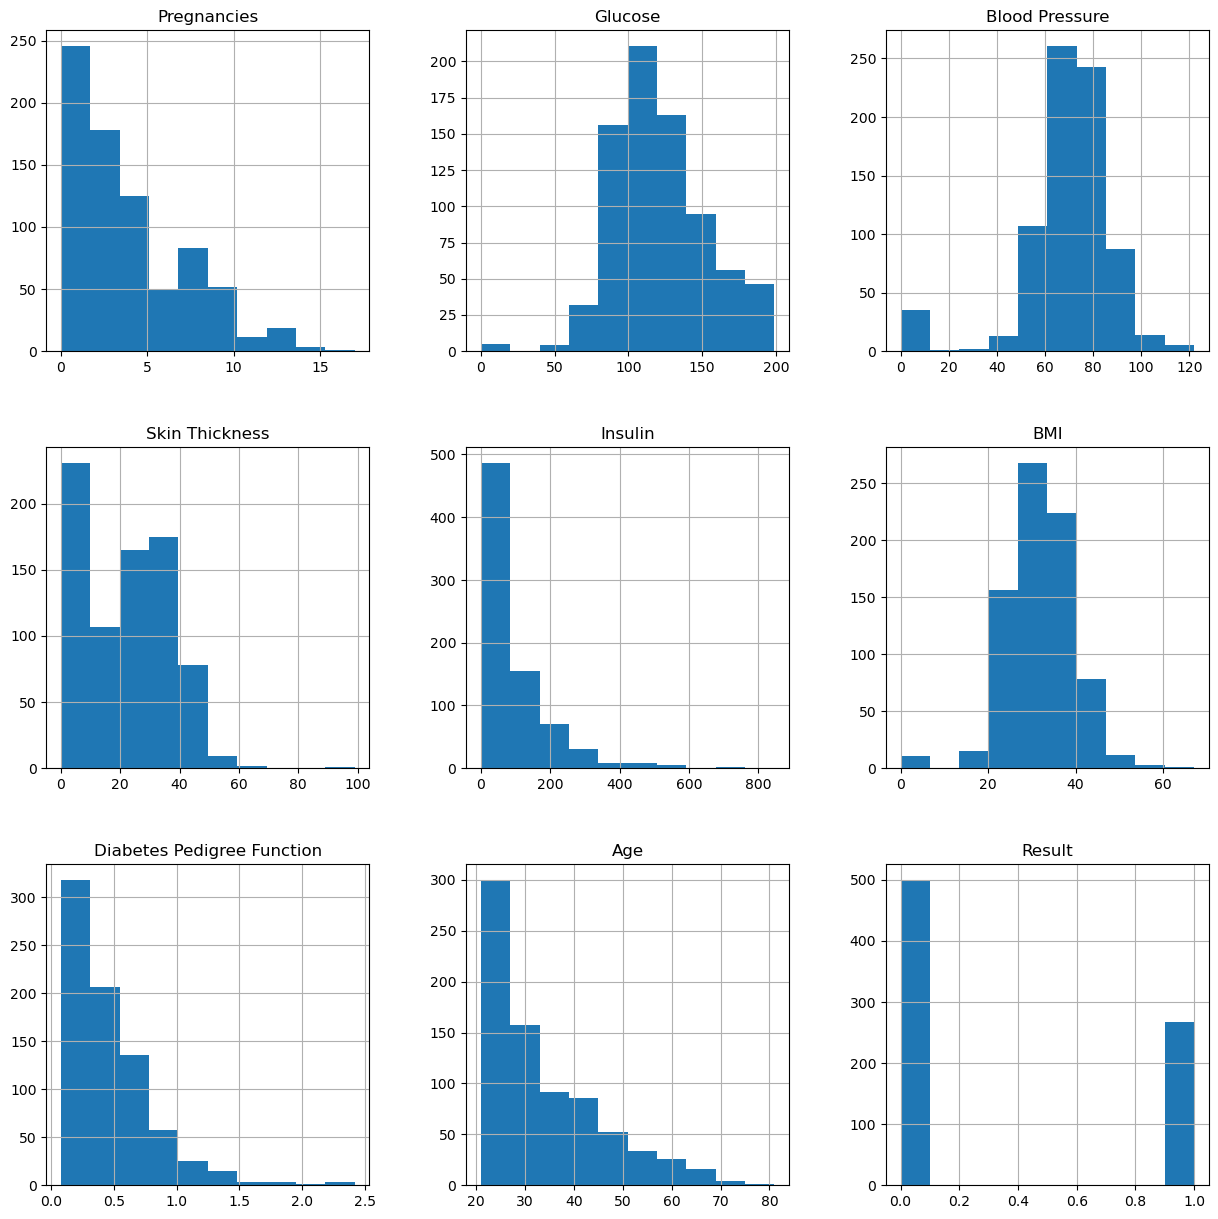

In [6]:
data.hist(bins=10,figsize=(15,15))
plt.show()

<Axes: >

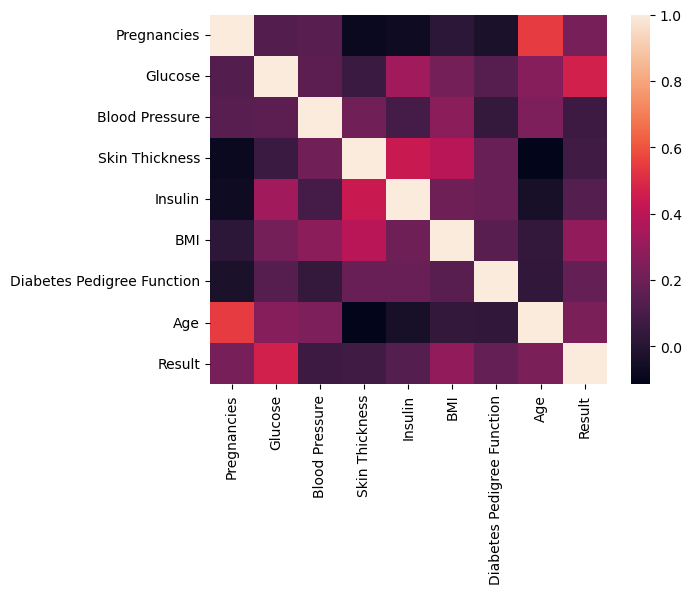

In [7]:
sns.heatmap(data.corr())

<Axes: xlabel='count', ylabel='Result'>

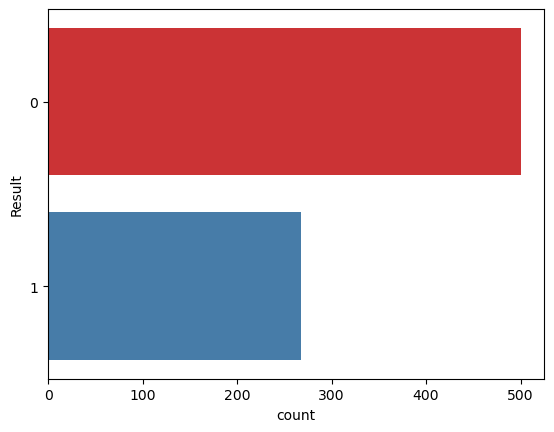

In [8]:
sns.countplot(y=data['Result'],palette='Set1')

<Axes: >

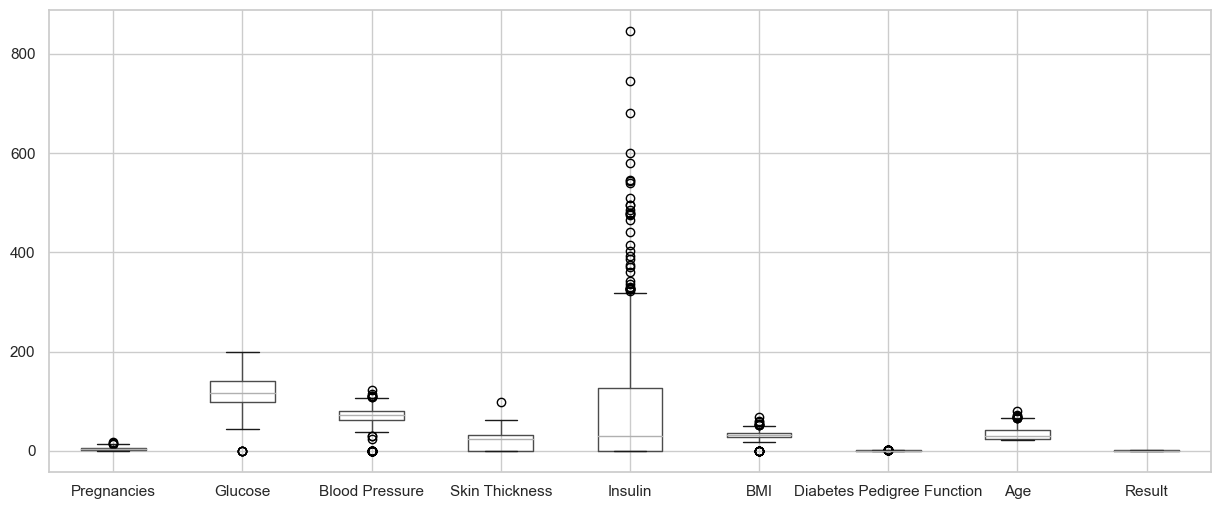

In [9]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

## Outliers Removal - IQR technique

In [10]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

print("---dQ1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR--- \n",IQR)

---dQ1--- 
 Pregnancies                    1.00000
Glucose                       99.00000
Blood Pressure                62.00000
Skin Thickness                 0.00000
Insulin                        0.00000
BMI                           27.30000
Diabetes Pedigree Function     0.24375
Age                           24.00000
Result                         0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                     6.00000
Glucose                       140.25000
Blood Pressure                 80.00000
Skin Thickness                 32.00000
Insulin                       127.25000
BMI                            36.60000
Diabetes Pedigree Function      0.62625
Age                            41.00000
Result                          1.00000
Name: 0.75, dtype: float64

---IQR--- 
 Pregnancies                     5.0000
Glucose                        41.2500
Blood Pressure                 18.0000
Skin Thickness                 32.0000
Insulin                       127.2500
BMI

In [11]:
#diabetes_dataset

data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape

((768, 9), (639, 9))

<Axes: xlabel='count', ylabel='Result'>

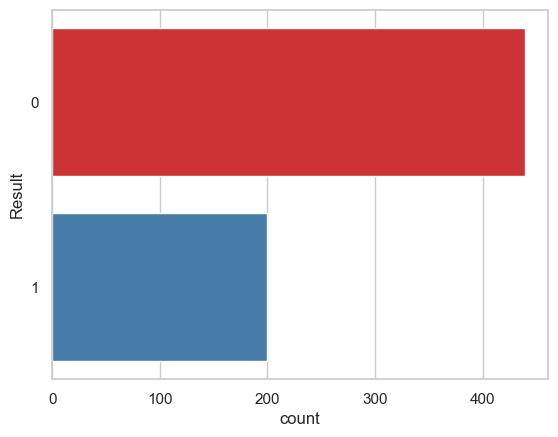

In [12]:
sns.countplot(y=data_out['Result'],palette='Set1')

## Module 2 - Data Preprocessing

### Feature Engineering

In [13]:
X=data_out.drop(columns=['Result'])
y=data_out['Result']

def bp_group(row):
    if row['Blood Pressure'] < 60:
        return '0'
    elif row['Blood Pressure'] > 60 and row['Blood Pressure'] < 80:
        return '1'
    elif row['Blood Pressure'] > 80 and row['Blood Pressure'] < 90:
        return '2'
    else:
        return '3'

X['bp'] = X.apply(bp_group,axis=1)

def bmi_group(row):
    if row['BMI'] < 18.5:
        return '0'
    elif row['BMI'] > 18.5 and row['BMI'] < 25:
        return '1'
    elif row['BMI'] > 25 and row['BMI'] < 30:
        return '2'
    elif row['BMI'] > 30 and row ['BMI'] < 40:
        return '3'
    else:
        return '4'

X['bmi_status'] = X.apply(bmi_group,axis=1)

def age_group(row):
    if row['Age'] < 30:
        return '0'
    elif row['Age'] > 30 and row['Age'] > 62:
        return '1'
    else:
        return '2'

X['age_group'] = X.apply(age_group,axis=1)

def num_preg(row):
    if row['Pregnancies'] < 2:
        return '0'
    elif row['Pregnancies'] > 2 and row['Pregnancies'] < 5:
        return '1'
    else:
        return '2'
    
X['num_preg'] = X.apply(num_preg,axis=1)

#### Data after feature engineering

In [14]:
X.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,bp,bmi_status,age_group,num_preg
0,6,148,72,35,0,33.6,0.627,50,1,3,2,2
1,1,85,66,29,0,26.6,0.351,31,1,2,2,0
2,8,183,64,0,0,23.3,0.672,32,1,1,2,2
3,1,89,66,23,94,28.1,0.167,21,1,2,0,0
5,5,116,74,0,0,25.6,0.201,30,1,2,2,2


### Data Splitting

In [15]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((447, 12), (192, 12), (447,), (192,))

### Data Normalisation

In [16]:
norm=MinMaxScaler().fit(train_X)
train_X_norm=norm.transform(train_X)
test_X_norm=norm.transform(test_X)

# Module 3 - SVM Model

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM model
model = SVC(kernel='linear', C=1.0, gamma='auto')

# Train the model
model.fit(train_X_norm, train_y)

# Make predictions on the testing set
y_pred1 = model.predict(test_X_norm)

# Calculate accuracy score
accuracy = accuracy_score(test_y, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy*100))

keras_model = Sequential()
keras_model.add(Dense(1, input_dim=12, activation='sigmoid', use_bias=False))
keras_model.layers[0].set_weights([model.coef_.T])
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# evaluate Keras model on testing set
keras_model.fit(train_X_norm, train_y, batch_size=10, epochs=500)
score = keras_model.evaluate(test_X_norm, test_y, verbose=0)
print('Test accuracy:', score[1]*100)

keras_model.save('svm.h5')

Accuracy: 80.21%
Epoch 1/500
45/45 [==============================] - 1s 2ms/step - loss: 2.2346 - accuracy: 0.3266
Epoch 2/500
45/45 [==============================] - 0s 2ms/step - loss: 2.1136 - accuracy: 0.3266
Epoch 3/500
45/45 [==============================] - 0s 2ms/step - loss: 1.9945 - accuracy: 0.3266
Epoch 4/500
45/45 [==============================] - 0s 2ms/step - loss: 1.8780 - accuracy: 0.3266
Epoch 5/500
45/45 [==============================] - 0s 2ms/step - loss: 1.7645 - accuracy: 0.3266
Epoch 6/500
45/45 [==============================] - 0s 2ms/step - loss: 1.6543 - accuracy: 0.3266
Epoch 7/500
45/45 [==============================] - 0s 2ms/step - loss: 1.5494 - accuracy: 0.3266
Epoch 8/500
45/45 [==============================] - 0s 2ms/step - loss: 1.4471 - accuracy: 0.3266
Epoch 9/500
45/45 [==============================] - 0s 2ms/step - loss: 1.3514 - accuracy: 0.3266
Epoch 10/500
45/45 [==============================] - 0s 2ms/step - loss: 1.2616 - accuracy:

45/45 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6913
Epoch 83/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6935
Epoch 84/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.6957
Epoch 85/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6957
Epoch 86/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.6957
Epoch 87/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.6935
Epoch 88/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6957
Epoch 89/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6980
Epoch 90/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6957
Epoch 91/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.6980
Epoch 92/500


45/45 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7136
Epoch 164/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7114
Epoch 165/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7069
Epoch 166/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7114
Epoch 167/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7069
Epoch 168/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.7092
Epoch 169/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7092
Epoch 170/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7136
Epoch 171/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7114
Epoch 172/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7114
Epoc

45/45 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.7181
Epoch 245/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7159
Epoch 246/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7159
Epoch 247/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7181
Epoch 248/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.7181
Epoch 249/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.7204
Epoch 250/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.7181
Epoch 251/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7159
Epoch 252/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7159
Epoch 253/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.7159
Epoc

45/45 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.7114
Epoch 326/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7159
Epoch 327/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7114
Epoch 328/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7136
Epoch 329/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7114
Epoch 330/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.7114
Epoch 331/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.7136
Epoch 332/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7136
Epoch 333/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7136
Epoch 334/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7136
Epoc

45/45 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7181
Epoch 407/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7204
Epoch 408/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7226
Epoch 409/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7226
Epoch 410/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7204
Epoch 411/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7204
Epoch 412/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.7226
Epoch 413/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.7181
Epoch 414/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7226
Epoch 415/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7226
Epoc

45/45 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7159
Epoch 488/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7159
Epoch 489/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.7159
Epoch 490/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7204
Epoch 491/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.7204
Epoch 492/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.7159
Epoch 493/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7204
Epoch 494/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7181
Epoch 495/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.7181
Epoch 496/500
45/45 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7159
Epoc

### Confusion Matrix - SVM

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred1)
cm

array([[127,  11],
       [ 27,  27]], dtype=int64)

Text(92.25, 0.5, 'Truth')

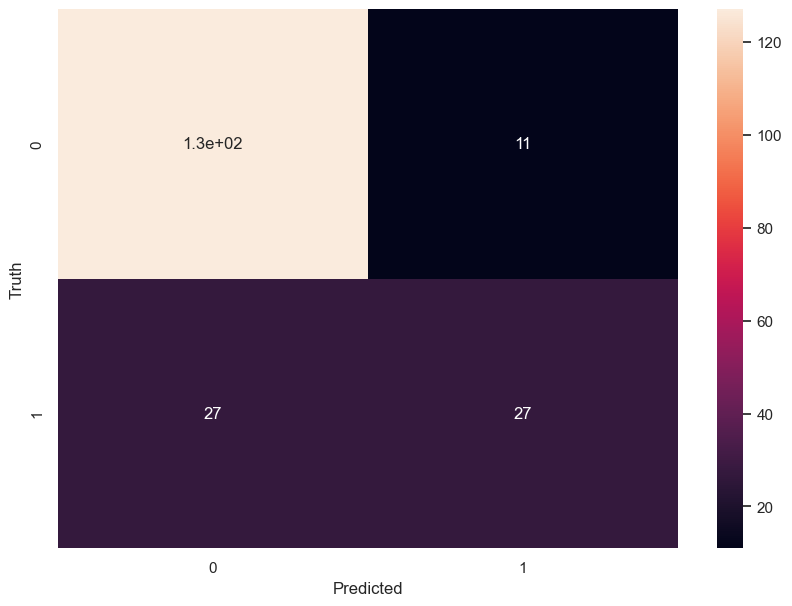

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Performance Evaluation (Validation) - SVM

In [20]:
tn, fp, fn, tp = cm.ravel()

# Compute the performance metrics
missrate = fn / (fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the results
print(f"Miss rate: {missrate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive predictive value: {ppv:.4f}")
print(f"Negative predictive value: {npv:.4f}")
print(f"False positive rate: {fpr:.4f}")
print(f"False negative rate: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

Miss rate: 0.5000
Sensitivity: 0.5000
Specificity: 0.9203
Positive predictive value: 0.7105
Negative predictive value: 0.8247
False positive rate: 0.0797
False negative rate: 0.5000
F1 score: 0.5870


# Module 4 - ANN Model

In [21]:
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=train_X_norm.shape[1]))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN
classifier.fit(train_X_norm, train_y, batch_size=10, epochs=500)

# Predict test set results
y_pred2 = classifier.predict(test_X_norm)
for i in range(len(y_pred2)):
    if(y_pred2[i] > 0.4):
        y_pred2[i] = 1
    else:
        y_pred2[i] = 0
accuracy = accuracy_score(test_y, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/500
45/45 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.6667
Epoch 2/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6734
Epoch 3/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6734
Epoch 4/500
45/45 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6734
Epoch 5/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6734
Epoch 6/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6734
Epoch 7/500
45/45 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6734
Epoch 8/500
45/45 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6734
Epoch 9/500
45/45 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.6734
Epoch 10/500
45/45 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6734
Epoch 11/

45/45 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8031
Epoch 84/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7942
Epoch 85/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7987
Epoch 86/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.7919
Epoch 87/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7987
Epoch 88/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7964
Epoch 89/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7919
Epoch 90/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.7987
Epoch 91/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.7808
Epoch 92/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7919
Epoch 93/500


45/45 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7987
Epoch 165/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.7964
Epoch 166/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.7964
Epoch 167/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8009
Epoch 168/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.7987
Epoch 169/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.7964
Epoch 170/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8009
Epoch 171/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8076
Epoch 172/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8031
Epoch 173/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.7964
Epoc

45/45 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8054
Epoch 246/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8121
Epoch 247/500
45/45 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8076
Epoch 248/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8143
Epoch 249/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8031
Epoch 250/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8098
Epoch 251/500
45/45 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8076
Epoch 252/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8121
Epoch 253/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8076
Epoch 254/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8076
Epoc

45/45 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8098
Epoch 327/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8121
Epoch 328/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8143
Epoch 329/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8121
Epoch 330/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8054
Epoch 331/500
45/45 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8121
Epoch 332/500
45/45 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8121
Epoch 333/500
45/45 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8009
Epoch 334/500
45/45 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8143
Epoch 335/500
45/45 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8143
Epoc

45/45 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8210
Epoch 408/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8098
Epoch 409/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8166
Epoch 410/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8188
Epoch 411/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8188
Epoch 412/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8210
Epoch 413/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8076
Epoch 414/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8121
Epoch 415/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8188
Epoch 416/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8121
Epoc

45/45 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8277
Epoch 489/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8210
Epoch 490/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8300
Epoch 491/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8233
Epoch 492/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8210
Epoch 493/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8277
Epoch 494/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8188
Epoch 495/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8233
Epoch 496/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8233
Epoch 497/500
45/45 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8233
Epoc

### Confusion Matrix - ANN

In [22]:
classifier.save('ann.h5')

from sklearn.metrics import confusion_matrix
counter = 30
cm = confusion_matrix(test_y, y_pred2)
cm

array([[113,  25],
       [ 21,  33]], dtype=int64)

Text(92.25, 0.5, 'Truth')

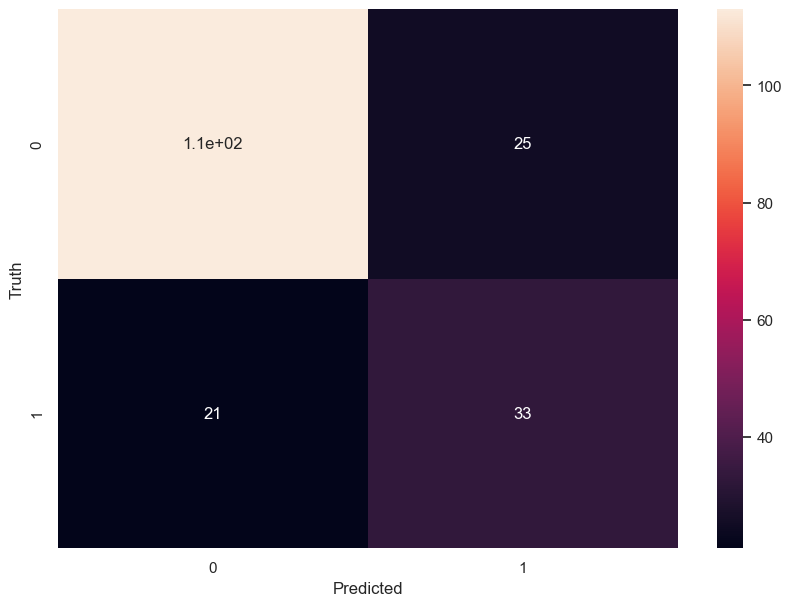

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Performance Evaluation (Validation) - ANN

In [24]:
tn, fp, fn, tp = cm.ravel()

# Compute the performance metrics
missrate = fn / (fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the results
print(f"Miss rate: {missrate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive predictive value: {ppv:.4f}")
print(f"Negative predictive value: {npv:.4f}")
print(f"False positive rate: {fpr:.4f}")
print(f"False negative rate: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

Miss rate: 0.3889
Sensitivity: 0.6111
Specificity: 0.8188
Positive predictive value: 0.5690
Negative predictive value: 0.8433
False positive rate: 0.1812
False negative rate: 0.3889
F1 score: 0.5893


## FUZZY LOGIC

In [25]:
#pip install -U scikit-fuzzy

In [26]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tensorflow.keras.models import load_model

In [27]:
ann_model=load_model('ann.h5')
svm_model=load_model('svm.h5')

# Create input variables for SVM and ANN models
svm_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'svm_input')
ann_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'ann_input')

# Create output variable for the fused model
diabetes_prediction = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'diabetes_prediction')

svm_output.automf(3)
ann_output.automf(3)

C:\Users\Asus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


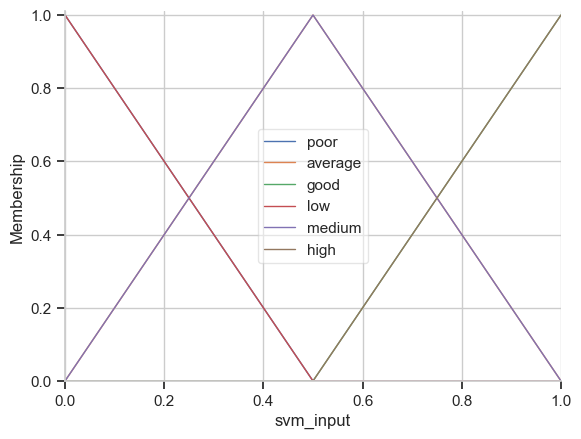

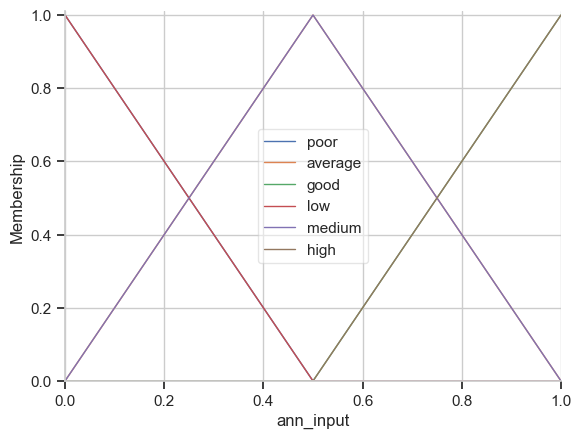

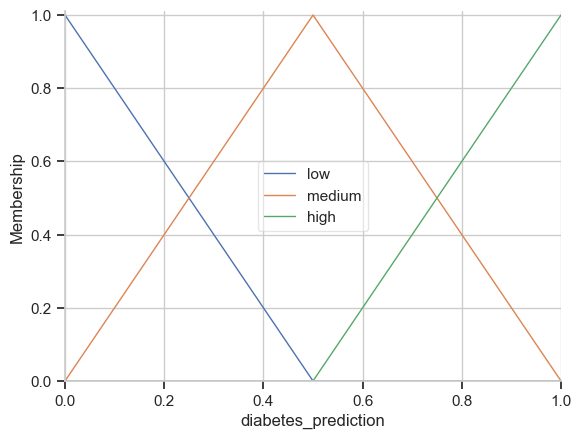

In [28]:
# Create fuzzy sets for input and output variables
svm_output['low'] = fuzz.trimf(svm_output.universe, [0, 0, 0.5])
svm_output['medium'] = fuzz.trimf(svm_output.universe, [0, 0.5, 1])
svm_output['high'] = fuzz.trimf(svm_output.universe, [0.5, 1, 1])

ann_output['low'] = fuzz.trimf(ann_output.universe, [0, 0, 0.5])
ann_output['medium'] = fuzz.trimf(ann_output.universe, [0, 0.5, 1])
ann_output['high'] = fuzz.trimf(ann_output.universe, [0.5, 1, 1])

diabetes_prediction['low'] = fuzz.trimf(diabetes_prediction.universe, [0, 0, 0.5])
diabetes_prediction['medium'] = fuzz.trimf(diabetes_prediction.universe, [0, 0.5, 1])
diabetes_prediction['high'] = fuzz.trimf(diabetes_prediction.universe, [0.5, 1, 1])

svm_output.view()
ann_output.view()
diabetes_prediction.view()

In [29]:
# Define fuzzy rules for the fused model
rule1 = ctrl.Rule(svm_output['low'] & ann_output['low'], diabetes_prediction['low'])
rule2 = ctrl.Rule(svm_output['low'] & ann_output['medium'], diabetes_prediction['medium'])
rule3 = ctrl.Rule(svm_output['low'] & ann_output['high'], diabetes_prediction['high'])
rule4 = ctrl.Rule(svm_output['medium'] & ann_output['low'], diabetes_prediction['medium'])
rule5 = ctrl.Rule(svm_output['medium'] & ann_output['medium'], diabetes_prediction['medium'])
rule6 = ctrl.Rule(svm_output['medium'] & ann_output['high'], diabetes_prediction['high'])
rule7 = ctrl.Rule(svm_output['high'] & ann_output['low'], diabetes_prediction['high'])
rule8 = ctrl.Rule(svm_output['high'] & ann_output['medium'], diabetes_prediction['high'])
rule9 = ctrl.Rule(svm_output['high'] & ann_output['high'], diabetes_prediction['high'])

# rule1.view()
# rule2.view()
# rule3.view()
# rule4.view()

In [30]:
fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

simulation = ctrl.ControlSystemSimulation(fuzzy_system)

svm_output_val = svm_model.predict(test_X_norm)  # replace X_test with your test data for SVM
ann_output_val = ann_model.predict(test_X_norm)  # replace X_test with your test data for ANN

simulation.input['svm_input'] = svm_output_val
simulation.input['ann_input'] = ann_output_val

simulation.compute()

fused_prediction = simulation.output['diabetes_prediction']
#print(fused_prediction)

6/6 [==============================] - 0s 2ms/step


In [31]:
for i in range(len(fused_prediction)):
    if fused_prediction[i] >= 0.5:
        fused_prediction[i] = 1
    else:
        fused_prediction[i]=0
for i in range(len(test_y)):
    if fused_prediction[i] == test_y.iloc[i]:
        counter += 1
print("Accuracy: ", counter/len(test_y)*100)

Accuracy:  89.0625


In [32]:
from sklearn.metrics import classification_report
print(classification_report(fused_prediction, test_y))

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       123
         1.0       0.67      0.52      0.59        69

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.73      0.73      0.73       192



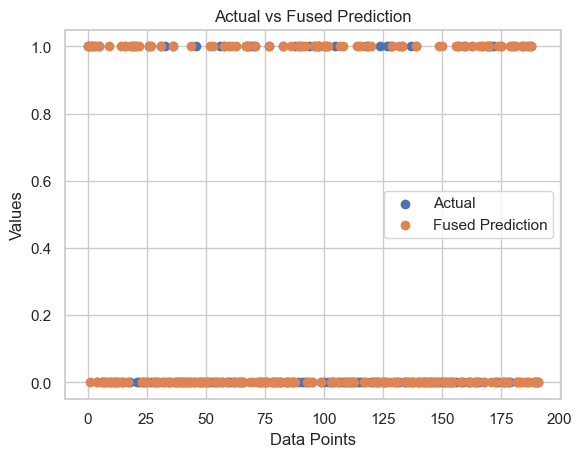

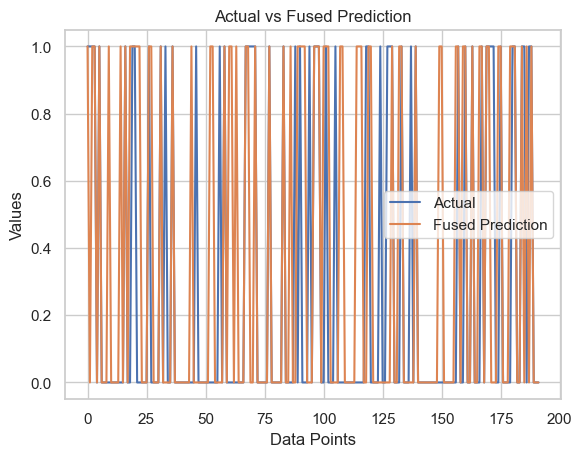

In [33]:
import matplotlib.pyplot as plt

# Plotting a scatter plot
plt.scatter(range(len(test_y)), test_y, label='Actual')
plt.scatter(range(len(fused_prediction)), fused_prediction, label='Fused Prediction')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Fused Prediction')
plt.legend()
plt.show()

# Plotting a line plot
plt.plot(range(len(test_y)), test_y, label='Actual')
plt.plot(range(len(fused_prediction)), fused_prediction, label='Fused Prediction')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Fused Prediction')
plt.legend()
plt.show()